In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from google.colab import files
uploaded = files.upload()

Saving AB_NYC_2019.csv to AB_NYC_2019.csv


In [7]:
import io
df = pd.read_csv(io.BytesIO(uploaded['AB_NYC_2019.csv']))

In [8]:
df.shape

(48895, 16)

In [8]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [9]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [10]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [12]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [13]:
df.duplicated().sum()

0

Let's remove name, host_name and last_review columns. Then replace NaNs in reviews_per_moth with zeros.

In [14]:
df.drop(columns = ['host_name','last_review','name'],inplace=True)


In [15]:
df.fillna(value=0,inplace=True)

In [16]:
df.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               48895 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

In [22]:
top_host = df['host_id'].value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [41]:
brooklyn = df.loc[df['neighbourhood_group'] == 'Brooklyn']
manhattan = df.loc[df['neighbourhood_group'] == 'Manhattan']
staten_island = df.loc[df['neighbourhood_group'] == 'Staten Island']
bronx = df.loc[df['neighbourhood_group'] == 'Bronx']
queens = df.loc[df['neighbourhood_group'] == 'Queens']

prices = {'brooklyn':brooklyn['price'],'manhattan':manhattan['price'],'staten_islands':staten_island['price'],
          'bronx':bronx['price'],'queens':queens['price']
          }

In [48]:
for key in prices:
  print(key,prices[key].describe())

brooklyn count    20104.000000
mean       124.383207
std        186.873538
min          0.000000
25%         60.000000
50%         90.000000
75%        150.000000
max      10000.000000
Name: price, dtype: float64
manhattan count    21661.000000
mean       196.875814
std        291.383183
min          0.000000
25%         95.000000
50%        150.000000
75%        220.000000
max      10000.000000
Name: price, dtype: float64
staten_islands count     373.000000
mean      114.812332
std       277.620403
min        13.000000
25%        50.000000
50%        75.000000
75%       110.000000
max      5000.000000
Name: price, dtype: float64
bronx count    1091.000000
mean       87.496792
std       106.709349
min         0.000000
25%        45.000000
50%        65.000000
75%        99.000000
max      2500.000000
Name: price, dtype: float64
queens count     5666.000000
mean        99.517649
std        167.102155
min         10.000000
25%         50.000000
50%         75.000000
75%        110.000000

Seems there are some outliers, we will get rid of them.

In [49]:
_df = df[df['price'] < 500]

<Axes: xlabel='neighbourhood_group', ylabel='price'>

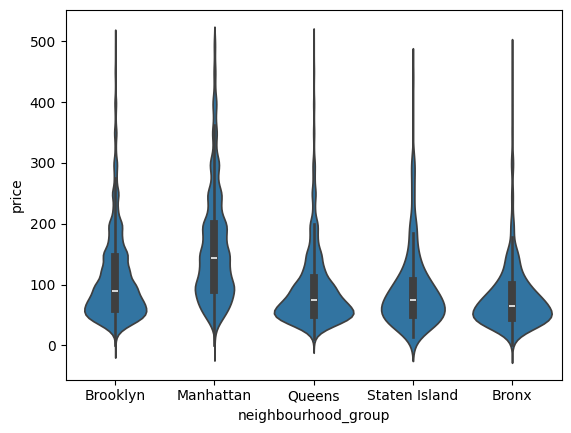

In [52]:
sns.violinplot(data = _df,x='neighbourhood_group',y='price')

We can observe Manhattan has the highest range of prices, Bronx and Queens appeares to have simmilar price distributions, Bronx is the cheapest.


Text(0.5, 1.0, 'Brooklyn room type distribution')

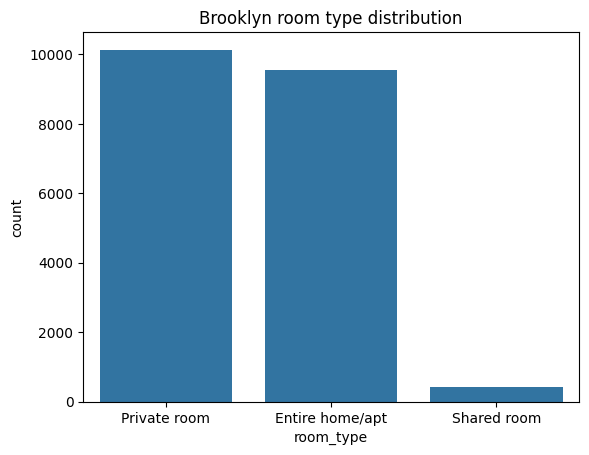

In [60]:
sns.countplot(data = brooklyn, x = 'room_type')
plt.title('Brooklyn room type distribution')

Text(0.5, 1.0, 'Staten Island type distribution')

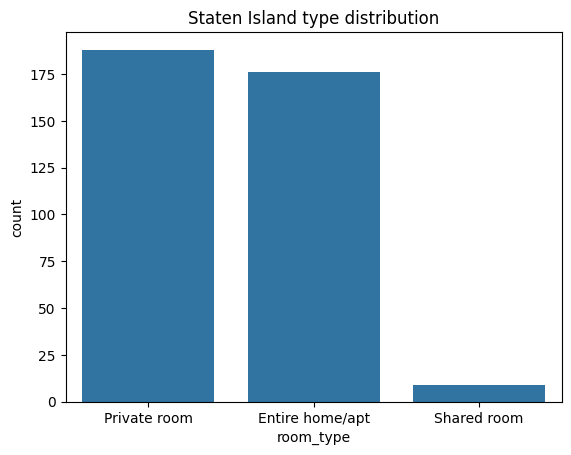

In [61]:
sns.countplot(data = staten_island, x = 'room_type')
plt.title('Staten Island type distribution')

Text(0.5, 1.0, 'Queens room type distribution')

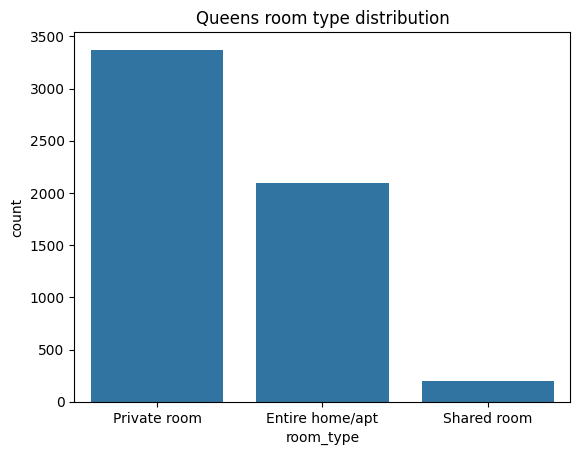

In [62]:
sns.countplot(data = queens, x = 'room_type')
plt.title('Queens room type distribution')

Text(0.5, 1.0, 'Manhattan room type distribution')

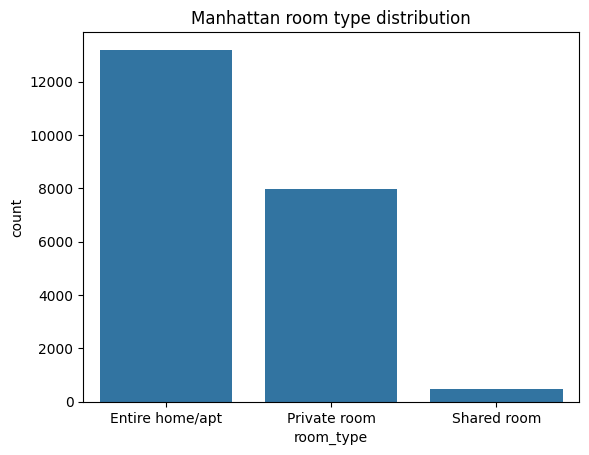

In [63]:
sns.countplot(data = manhattan, x = 'room_type')
plt.title('Manhattan room type distribution')

Text(0.5, 1.0, 'Bronx room type distribution')

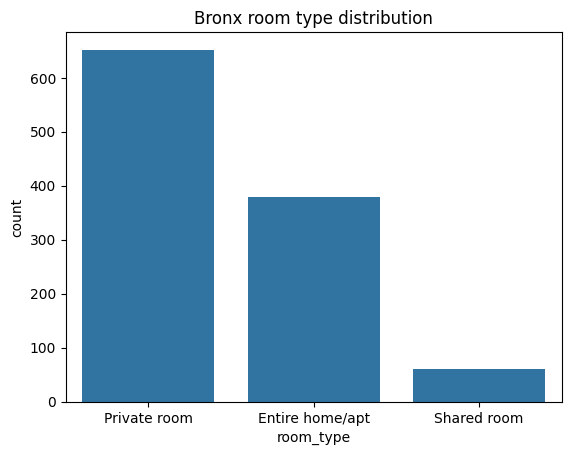

In [64]:
sns.countplot(data = bronx, x = 'room_type')
plt.title('Bronx room type distribution')

Let's explore the dataset and correlations between features!

In [22]:
df.dtypes

id                                  int64
host_id                             int64
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [23]:
num_columns = ['latitude','longitude','price','minimum_nights','number_of_reviews',
            'reviews_per_month','calculated_host_listings_count','availability_365']
cat_columns = ['neighbourhood_group','neighbourhood','room_type']
df_num = df[num_columns]
df_cat = df[cat_columns]

In [24]:
for column in df_cat.columns:
  print(len(df_cat[column].unique()))

5
221
3


<Axes: >

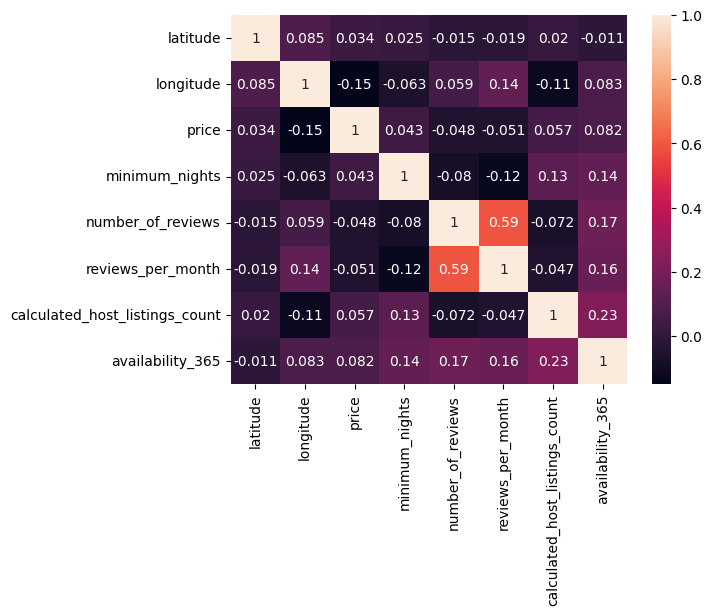

In [26]:
corr_pearson = df_num.corr(method='pearson')
sns.heatmap(corr_pearson,annot=True)


<Axes: >

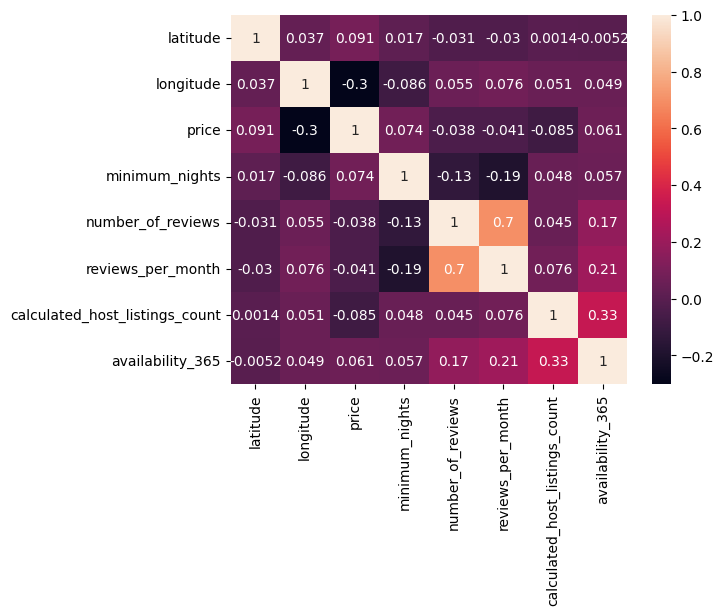

In [27]:
corr_kendall = df_num.corr(method='kendall')
sns.heatmap(corr_kendall,annot=True)

We can definitelly expect correlation between price and categorical variables. Especially room_type and neighbourhood.


In [30]:
price_neigh = pd.concat([df['price'],df['neighbourhood']],axis=1)
price_room = pd.concat([df['price'],df['room_type']],axis=1)
price_ngroup = pd.concat([df['price'],df['neighbourhood_group']],axis=1)

In [52]:
mean_per_neigh = price_neigh.groupby('neighbourhood').mean()
mean_per_roomtype = price_room.groupby('room_type').mean()
mean_per_ngroup = price_ngroup.groupby('neighbourhood_group').mean()


In [72]:
mean_per_ngroup


,price
neighbourhood_group,
Bronx,87.496792
Brooklyn,124.383207
Manhattan,196.875814
Queens,99.517649
Staten Island,114.812332


In [76]:
mean_per_roomtype


,price
room_type,
Entire home/apt,211.794246
Private room,89.780973
Shared room,70.127586


In [77]:
mean_per_neigh

,price
neighbourhood,
Allerton,87.595238
Arden Heights,67.250000
Arrochar,115.000000
Arverne,171.779221
Astoria,117.187778
...,...
Windsor Terrace,138.993631
Woodhaven,67.170455
Woodlawn,60.090909


Relation between neighbourhood and availiability

<Axes: xlabel='neighbourhood_group', ylabel='availability_365'>

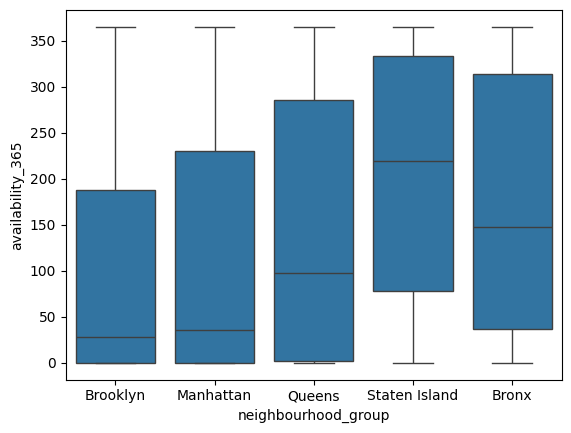

In [79]:
sns.boxplot(data=df,x='neighbourhood_group',y='availability_365')

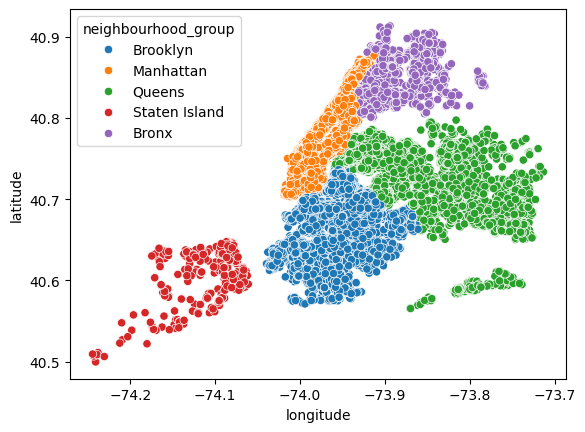

In [92]:
sns.scatterplot(data=df,x=df.longitude,y=df.latitude,hue=df.neighbourhood_group)
plt.show()
plt.ioff()

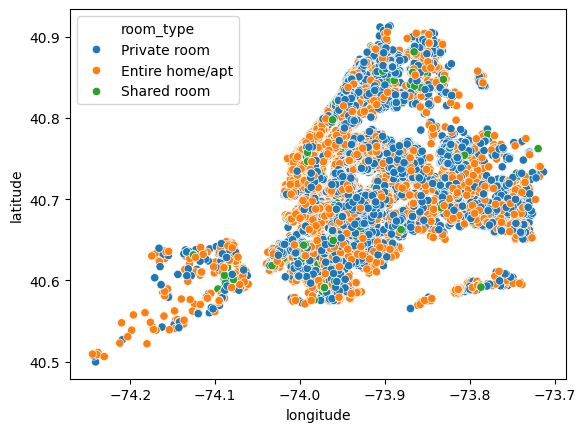

In [94]:
sns.scatterplot(data=df,x=df.longitude,y=df.latitude,hue=df.room_type)
plt.show()
plt.ioff()

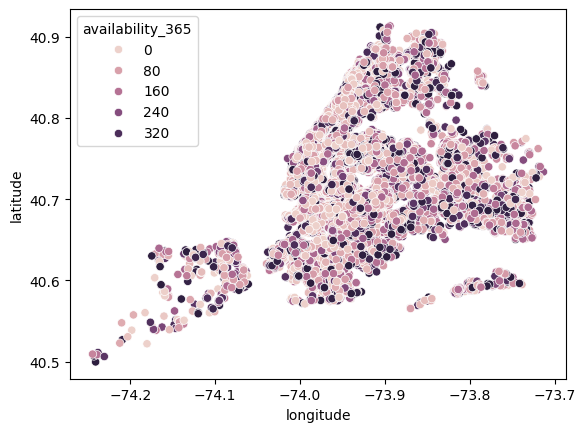

In [96]:
sns.scatterplot(data=df,x=df.longitude,y=df.latitude,hue=df.availability_365)
plt.show()
plt.ioff()

Regression

In [103]:
rooms_encoded = pd.get_dummies(df_cat['room_type'])
neigh_group = pd.get_dummies(df_cat['neighbourhood_group'])
cat_variables_encoded = pd.concat([rooms_encoded,neigh_group],axis=1)

In [109]:
X = pd.concat([df_num,cat_variables_encoded],axis=1)
y = df['price']

In [119]:
corr_X = X.corr(method='kendall')


In [118]:
corr_X['price'].sort_values()

Private room                     -0.514563
longitude                        -0.302361
Brooklyn                         -0.162445
Queens                           -0.160593
Shared room                      -0.137527
Bronx                            -0.090210
calculated_host_listings_count   -0.085327
reviews_per_month                -0.041318
Staten Island                    -0.038774
number_of_reviews                -0.037926
availability_365                  0.061053
minimum_nights                    0.074233
latitude                          0.090532
Manhattan                         0.298004
Entire home/apt                   0.554911
price                             1.000000
Name: price, dtype: float64

Let's try to make some predictions based on regression model.

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [132]:
X = _df.drop(columns = ['price','latitude','longitude','neighbourhood','number_of_reviews','reviews_per_month','id','host_id'])
y = _df['price']
X_cat = X.select_dtypes(include = 'object')
X_num = X.select_dtypes(exclude = 'object')

In [161]:
y.shape, X.shape

((47660,), (47660, 5))

In [162]:
X_cat.head()

,neighbourhood_group,room_type
0,Brooklyn,Private room
1,Manhattan,Entire home/apt
2,Manhattan,Private room
3,Brooklyn,Entire home/apt
4,Manhattan,Entire home/apt


In [163]:
ng_encoded = pd.get_dummies(X_cat['neighbourhood_group'])
rt_encoded = pd.get_dummies(X_cat['room_type'])
X_cat_encoded =  pd.concat([ng_encoded,rt_encoded],axis=1)
X_cat_encoded.reset_index(drop=True,inplace=True)
scaler = StandardScaler()
X_num_scaled = pd.DataFrame(scaler.fit_transform(X_num))
X_num_scaled.reset_index(drop=True,inplace=True)

In [164]:
_X = pd.concat([X_num_scaled,X_cat_encoded],axis=1)
_X.columns = [str(col) for col in _X.columns]

In [165]:
_X.head(20)

,0,1,2,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
0,-0.293948,-0.033397,1.940665,0,1,0,0,0,0,1,0
1,-0.293948,-0.155268,1.864256,0,0,1,0,0,1,0,0
2,-0.195606,-0.185735,1.940665,0,0,1,0,0,0,1,0
3,-0.293948,-0.185735,0.634056,0,1,0,0,0,1,0,0
4,0.148590,-0.185735,-0.848295,0,0,1,0,0,1,0,0
5,-0.195606,-0.185735,0.137392,0,0,1,0,0,1,0,0
6,1.869568,-0.185735,-0.848295,0,1,0,0,0,0,1,0
7,-0.244777,-0.185735,0.832722,0,0,1,0,0,0,1,0
8,-0.244777,-0.185735,-0.848295,0,0,1,0,0,0,1,0
9,-0.293948,-0.094333,0.588211,0,0,1,0,0,1,0,0


In [176]:
X_train,X_test,y_train,y_test=train_test_split(_X,y,test_size=.2,random_state=42)

In [177]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(38128, 11) (9532, 11) (38128,) (9532,)


In [178]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [181]:
r2 = r2_score(y_test,y_pred)

In [180]:
r2

0.39836078222464555

In [187]:
reg_lass = Lasso(alpha=0.1)
reg_lass.fit(X_train,y_train)
y_pred_ = reg_lass.predict(X_test)
r2_ = r2_score(y_test,y_pred_)
r2_




0.39810589913572947